<a href="https://colab.research.google.com/github/Shilajit-CR7/ML-Works/blob/main/Image_Segmentation_(Dominant_Colors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import cv2

In [ ]:
img = cv2.imread('ele.jpg')
print(img.shape)

(1024, 1536, 3)


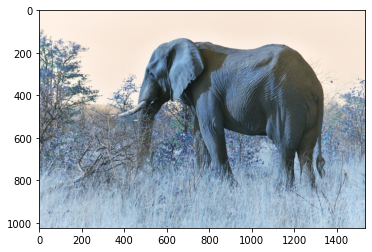

In [ ]:
plt.imshow(img)
plt.show()
# Matplotlib does't display the colors of the image as it is.

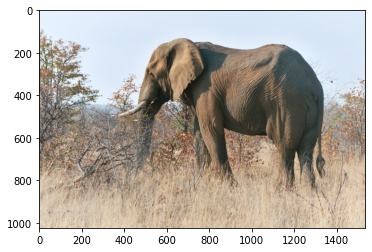

In [ ]:
img = cv2.imread('ele.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Flatten each channel of the image

In [ ]:
print(img.shape)

(1024, 1536, 3)


In [ ]:
all_pixels = img.reshape((1024*1536,3))
all_pixels.shape

(1572864, 3)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
dominat_colors = 4
model = KMeans(n_clusters=dominat_colors)
model = model.fit(all_pixels)

In [ ]:
model.cluster_centers_
# We get the RGB(R,G,B) co-ordinates. These are in floating type.
# So, we need to convert it into an int type.

array([[203.44995676, 183.87068576, 160.61987892],
       [ 69.03773161,  67.15133648,  58.8400623 ],
       [148.36247476, 128.17822564, 109.64189632],
       [221.09509457, 233.62252828, 247.04180142]])

In [ ]:
centers = np.array(model.cluster_centers_,dtype='uint8')
centers
#We got the RGB. ex: (R,G,B) = (203,183,160)

array([[203, 183, 160],
       [ 69,  67,  58],
       [148, 128, 109],
       [221, 233, 247]], dtype=uint8)

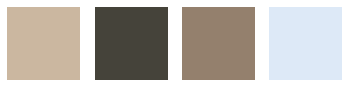

In [ ]:
# let's see what colors are these..
i = 1
plt.figure(figsize=(6,4))
colors = []
for color in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i = i + 1
    colors.append(color)
    #Color 
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = color
    plt.imshow(a)

In [ ]:
centers[0]

array([203, 183, 160], dtype=uint8)

# Segment

In [ ]:
new_img = np.zeros((1024*1536,3),dtype='uint8') ## Empty image => Intialization 

In [ ]:
model.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [ ]:
model.labels_.shape ## each pixel is classified as 1 of the 4 colors 

(1572864,)

In [ ]:
colors

[array([203, 183, 160], dtype=uint8),
 array([69, 67, 58], dtype=uint8),
 array([148, 128, 109], dtype=uint8),
 array([221, 233, 247], dtype=uint8)]

In [ ]:
all_pixels.shape

(1572864, 3)

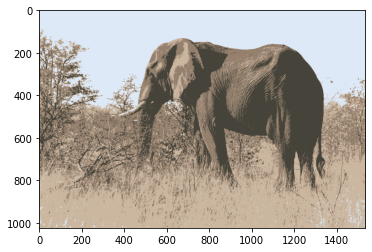

In [ ]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[model.labels_[i]] ## Fill each pixel with classified color
new_img = new_img.reshape((img.shape))
plt.imshow(new_img)
plt.show()

In [ ]:
img.shape

(1024, 1536, 3)